In [92]:
# FIRST RUN - import tidy format data CSV
# run PCA-->kmeans without spatial data (ie X,Y,Z coords)
# plot PCA and kmeans 

import pandas as pd

# Load the CSV file
# pathname = '/Users/jcoleman/Documents/--LARGE DATA--/#Pizzi/TBI-sham leak analysis/scripts/matlab-copy/September 2024/'
# filename = 'analysisData_091724.csv'
# df = pd.read_csv(pathname+filename)

pathname = '/Users/jcoleman/Documents/GitHub/NMCoop_Shared/#Pizzi/'
filename = 'df_for_pca_clean.csv'
df_for_pca = pd.read_csv(pathname+filename)

filename = 'df_pca_withIDs.csv'
df_for_pca_IDs = pd.read_csv(pathname+filename)
df_for_pca_IDs['group'] = df_for_pca_IDs['group'].map({'A': 1, 'B': 2})

print(df_for_pca_IDs['group'])
print(df_for_pca_IDs.shape)
print(df_for_pca['Z'])
print(df_for_pca.shape)



0      1
1      1
2      1
3      1
4      1
      ..
185    2
186    2
187    2
188    2
189    2
Name: group, Length: 190, dtype: int64
(190, 28)
0      10.0
1      20.0
2      25.0
3      55.0
4      15.0
       ... 
185    40.0
186    50.0
187    85.0
188    30.0
189     5.0
Name: Z, Length: 190, dtype: float64
(190, 11)


In [ ]:
# dfTable = pd.read_table(pathname+filename)

# print(dfTable.head())

In [128]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def perform_pca(data, n_components=2):
    """
    Perform PCA on the provided data and return the PCA transformed data.
    
    Parameters:
    data (DataFrame or ndarray): Input data for PCA.
    n_components (int): Number of principal components to return.
    
    Returns:
    DataFrame: PCA transformed data with specified number of components.
    """
    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Perform PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(data_scaled)
    
    # Convert to DataFrame
    columns = [f'PC{i+1}' for i in range(n_components)]
    pca_df = pd.DataFrame(data=principal_components, columns=columns)
    
    return pca_df

from sklearn.cluster import KMeans

def perform_kmeans(pca_data, n_clusters=3):
    """
    Perform K-means clustering on the PCA transformed data.
    
    Parameters:
    pca_data (DataFrame or ndarray): PCA transformed data.
    n_clusters (int): Number of clusters for K-means.
    
    Returns:
    DataFrame: Original PCA data with an additional 'Cluster' column for K-means results.
    """
    kmeans = KMeans(n_clusters=n_clusters)
    clusters = kmeans.fit_predict(pca_data)
    
    pca_data['Cluster'] = clusters
    
    return pca_data

import matplotlib.pyplot as plt

def plot_pca(pca_data, title='PCA Results'):
    """
    Plot the PCA results.
    
    Parameters:
    pca_data (DataFrame): PCA transformed data with optional 'group' column for color-coding.
    title (str): Title of the plot.
    """
    plt.figure(figsize=(8, 6))
    if 'group' in pca_data.columns:
        scatter = plt.scatter(pca_data['PC1'], pca_data['PC2'], c=pca_data['group'], cmap='viridis', alpha=0.7)
        plt.colorbar(scatter, label='Group')
    else:
        plt.scatter(pca_data['PC1'], pca_data['PC2'], alpha=0.7)
    
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True)
    plt.show()

def plot_kmeans(pca_data, pca_metadata, title='K-means Clustering Results'):
    """
    Plot the K-means clustering results.
    
    Parameters:
    pca_data (DataFrame): PCA transformed data with 'Cluster' column for K-means results.
    title (str): Title of the plot.
    """
    
    
#     get color code from group or logicals using - pca_metadata input
    plt.figure(figsize=(8, 6))
#     scatter = plt.scatter(pca_data['PC1'], pca_data['PC2'], c=pca_data['Cluster'], cmap='viridis', alpha=0.7)
    scatter = plt.scatter(pca_data['PC1'], pca_data['PC2'], c=pca_metadata, cmap='viridis', alpha=0.7)
#     # pca_colors
#     plt.colorbar(scatter, label='Cluster')
    plt.colorbar(scatter, label='Group')
    
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True)
    plt.show()





In [94]:
# Assuming 'data' is your original DataFrame without target columns
# numeric_cols = new_df.select_dtypes(include=['int64', 'float64']).columns #imputed_df.select_dtypes(include=['int64', 'float64']).columns
# df_for_pca = new_df[numeric_cols]#imputed_df[numeric_cols]
# df_for_pca = new_df.dropna()

pca_data = perform_pca(df_for_pca)

# print(numeric_cols)
# print(imputed_df)
print(df_for_pca)


# pca_data_with_clusters = perform_kmeans(pca_data, n_clusters=3)

# plot_pca(pca_data_with_clusters, title='PCA with Groups')
# plot_kmeans(pca_data_with_clusters, title='K-means Clustering Results')

     meanFWHM  stdevFWHM   minFWHM   maxFWHM  meanFeFv  stdevFeFv   minFeFv  \
0    3.740378   0.120027  3.542297  3.907355  0.301351   0.088444  0.164055   
1    4.100067   0.120158  3.922870  4.245508  0.718676   0.103000  0.559359   
2    6.326261   0.091814  6.202881  6.441604  0.083048   0.026864  0.049834   
3    6.066305   0.070735  5.974274  6.145408  0.849531   0.084406  0.713789   
4    5.886713   0.134211  5.693535  6.101866  0.222588   0.057162  0.110756   
..        ...        ...       ...       ...       ...        ...       ...   
185  5.816519   0.107876  5.646091  5.990243  0.090134   0.028919  0.043783   
186  4.390754   0.234357  4.028063  4.724228  0.873439   0.107320  0.726248   
187  4.813701   0.139542  4.588607  4.998082  0.264818   0.043021  0.183395   
188  4.484175   0.177509  4.274866  4.828402  0.339985   0.071784  0.242373   
189  4.959572   0.172043  4.645450  5.130429  0.542410   0.106330  0.418899   

      maxFeFv      X      Y     Z  
0    0.406216  

In [95]:
print(pca_data)

          PC1       PC2
0   -0.810099 -1.903101
1    0.013084 -1.176117
2   -2.720859 -0.233999
3   -0.770911  0.628583
4   -2.112532 -0.317172
..        ...       ...
185 -2.480560 -0.470577
186  0.305314 -0.301456
187 -1.612826 -0.947087
188 -1.077009 -0.991402
189 -0.636536 -0.622285

[190 rows x 2 columns]


In [96]:
pca_data_with_clusters = perform_kmeans(pca_data, n_clusters=3)

In [104]:
print(pca_data_with_clusters)
pca_data_with_clusters['Cluster']

          PC1       PC2  Cluster
0   -0.810099 -1.903101        2
1    0.013084 -1.176117        2
2   -2.720859 -0.233999        1
3   -0.770911  0.628583        2
4   -2.112532 -0.317172        2
..        ...       ...      ...
185 -2.480560 -0.470577        2
186  0.305314 -0.301456        2
187 -1.612826 -0.947087        2
188 -1.077009 -0.991402        2
189 -0.636536 -0.622285        2

[190 rows x 3 columns]


0      2
1      2
2      1
3      2
4      2
      ..
185    2
186    2
187    2
188    2
189    2
Name: Cluster, Length: 190, dtype: int32

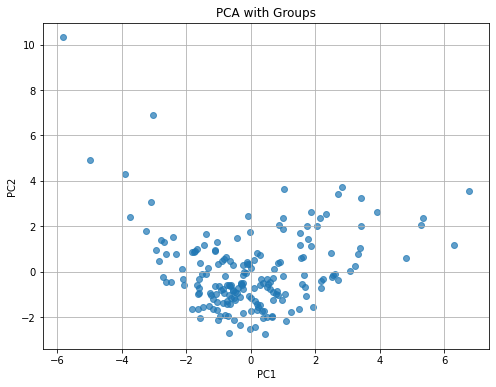

In [98]:
plot_pca(pca_data_with_clusters, title='PCA with Groups')

In [ ]:
plot_kmeans(pca_data_with_clusters, color_source, title='K-means Clustering Results')

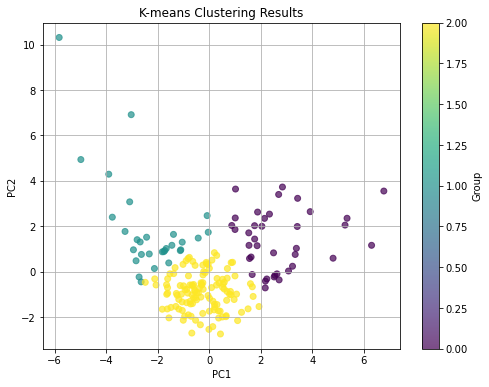

In [105]:
color_source = pca_data_with_clusters['Cluster']
# print(color_source)
plot_kmeans(pca_data_with_clusters, color_source, title='K-means Clustering Results')

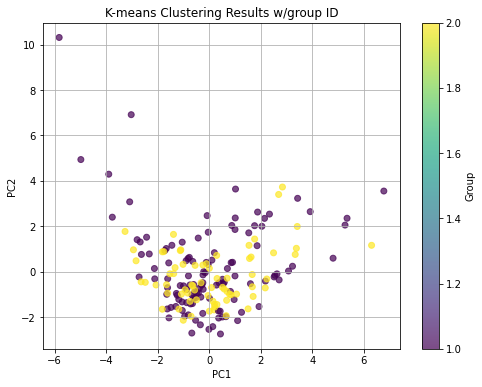

In [102]:
color_source = df_for_pca_IDs['group']
# print(color_source)
plot_kmeans(pca_data_with_clusters, color_source, title='K-means Clustering Results w/group ID')

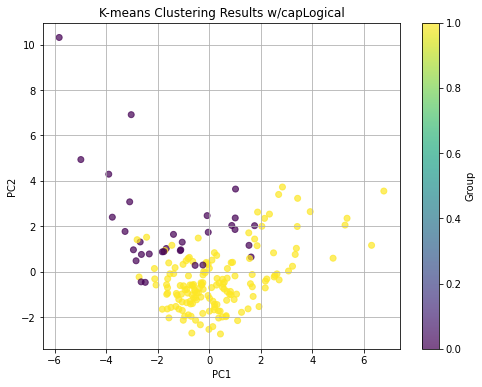

In [127]:
color_source = df_for_pca_IDs['capLogical']
# print(color_source)
plot_kmeans(pca_data_with_clusters, color_source, title='K-means Clustering Results w/capLogical')

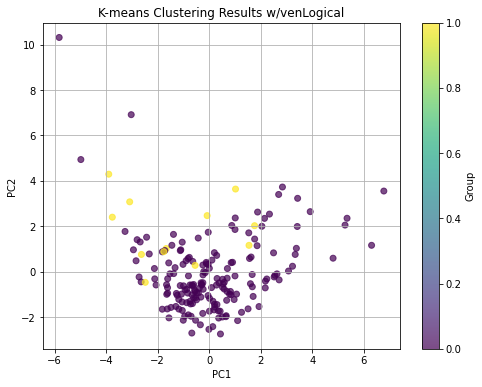

In [110]:
color_source = df_for_pca_IDs['venLogical']
# print(color_source)
plot_kmeans(pca_data_with_clusters, color_source, title='K-means Clustering Results w/venLogical')

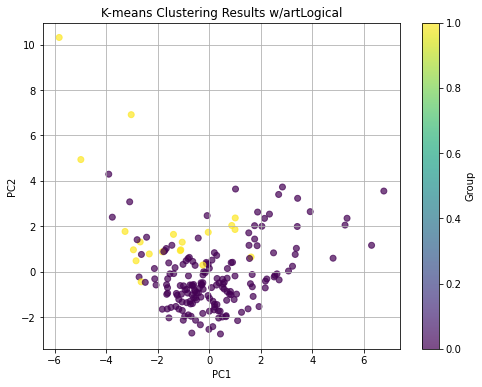

In [112]:
color_source = df_for_pca_IDs['artLogical']
# print(color_source)
plot_kmeans(pca_data_with_clusters, color_source, title='K-means Clustering Results w/artLogical')

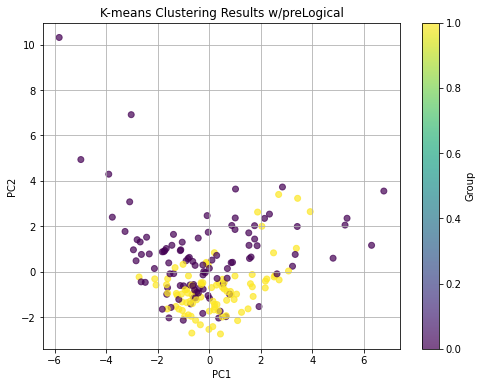

In [126]:
color_source = df_for_pca_IDs['midCapLogical']
# print(color_source)
plot_kmeans(pca_data_with_clusters, color_source, title='K-means Clustering Results w/preLogical')

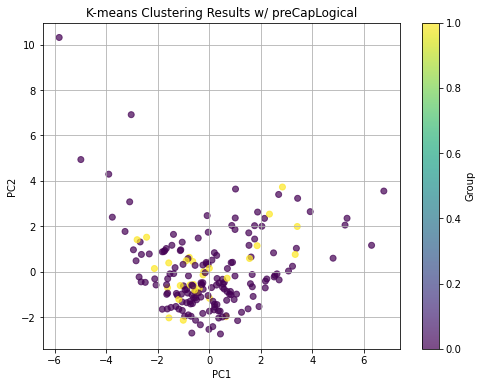

In [125]:
color_source = df_for_pca_IDs['preCapLogical']
# print(color_source)
plot_kmeans(pca_data_with_clusters, color_source, title='K-means Clustering Results w/ preCapLogical')

In [ ]:
# % plot PC1 v PC2 etc - overlay group, vessel type
# remove X, Y, Z - redo Fe/Fv w/ background ROIs/dff?